In [1]:
x=1

In [2]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import scanpy as sc
import numpy as np
import pandas as pd
import muon as mu
import scib

During startup - Warning message:
Setting LC_CTYPE failed, using "C" 


In [3]:
rna = sc.read('../../../data/hao-2020/rna_hvg_batch.h5ad')
rna = rna.copy()
rna

AnnData object with n_obs × n_vars = 149926 × 4000
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'Batch', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
    var: 'names', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: 'Batch_colors', 'celltype.l1_colors', 'celltype.l2_colors', 'celltype.l3_colors', 'donor_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'connectivities', 'distances'

In [4]:
adt = sc.read('../../../data/hao-2020/protein.h5ad')
adt = adt.copy()
adt

/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/muon/lib/python3.9/site-packages/anndata/_io/h5ad.py:238: OldFormatWarning: Element '/X' was written without encoding metadata.
  d[k] = read_elem(f[k])
/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/muon/lib/python3.9/site-packages/anndata/_io/h5ad.py:238: OldFormatWarning: Element '/layers' was written without encoding metadata.
  d[k] = read_elem(f[k])
/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/muon/lib/python3.9/site-packages/anndata/_io/specs/methods.py:92: OldFormatWarning: Element '/layers/count' was written without encoding metadata.
  return {k: read_elem(v) for k, v in elem.items()}
/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/muon/lib/python3.9/site-packages/anndata/_io/specs/methods.py:590: OldFormatWarning: Element '/obs/nCount_ADT' was written without encoding metadata.
  return read_elem(dataset)
/lustre/groups/ml01/workspace/anasta

/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/muon/lib/python3.9/site-packages/anndata/_io/h5ad.py:238: OldFormatWarning: Element '/uns' was written without encoding metadata.
  d[k] = read_elem(f[k])
/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/muon/lib/python3.9/site-packages/anndata/_io/specs/methods.py:92: OldFormatWarning: Element '/uns/Batch_colors' was written without encoding metadata.
  return {k: read_elem(v) for k, v in elem.items()}
/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/muon/lib/python3.9/site-packages/anndata/_io/specs/methods.py:92: OldFormatWarning: Element '/uns/celltype.l1_colors' was written without encoding metadata.
  return {k: read_elem(v) for k, v in elem.items()}
/lustre/groups/ml01/workspace/anastasia.litinetskaya/miniconda3/envs/muon/lib/python3.9/site-packages/anndata/_io/specs/methods.py:92: OldFormatWarning: Element '/uns/celltype.l2_colors' was written without encoding metadata.


AnnData object with n_obs × n_vars = 149926 × 228
    obs: 'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'Batch', 'n_genes', 'predicted.celltype.l1', 'predicted.celltype.l2', 'predicted.celltype.l3'
    var: 'n_cells'
    uns: 'Batch_colors', 'celltype.l1_colors', 'celltype.l2_colors', 'celltype.l3_colors', 'donor_colors', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'count'
    obsp: 'connectivities', 'distances'

In [5]:
adt.var_names = ['PROT_'+name for name in adt.var_names]
rna.var_names = ['RNA_'+name for name in rna.var_names]

In [6]:
mdata = mu.MuData({'rna': rna, 'adt': adt})
mdata

MuData object with n_obs × n_vars = 149926 × 4228
  var:	'n_cells'
  2 modalities
    rna:	149926 x 4000
      obs:	'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'Batch', 'n_genes', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt'
      var:	'names', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
      uns:	'Batch_colors', 'celltype.l1_colors', 'celltype.l2_colors', 'celltype.l3_colors', 'donor_colors', 'hvg', 'log1p', 'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'count'
      obsp:	'connectivities', 'distances'
    adt:	149926 x 228
      obs:	'nCount_ADT', 'nFeature_ADT', 'nCount_RNA', 'nFeature_RNA', 'orig.ident', 'lane', 'donor', 'time', 'celltype.l1', 'celltype.l2', 'celltype.l3', 'Phase', 'Batch', 'n_genes', 'predicted.celltype.l1', 'predicted.celltype.l2', 'predicted.celltype.l3'
      var:	'n_cells'
      uns:	'Batch_colors', 'celltype.l1_colors', 'celltype.l2_colors', 'celltype.l3_colors', 'donor_colors', 'neighbors', 'pca', 'umap'
      obsm:	'X_pca', 'X_umap'
      varm:	'PCs'
      layers:	'count'
      obsp:	'connectivities', 'distances'

In [7]:
mdata.obs['batch'] = mdata['rna'].obs['Batch'].astype('category').copy()
mdata.obs['cell_type'] = mdata['rna'].obs['celltype.l2'].astype('category').copy()

In [8]:
mu.tl.mofa(mdata, groups_label='batch', gpu_mode=True)


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        
Loaded view='rna' group='Batch1' with N=64344 samples and D=4000 features...
Loaded view='rna' group='Batch2' with N=85582 samples and D=4000 features...
Loaded view='adt' group='Batch1' with N=64344 samples and D=228 features...
Loaded view='adt' group='Batch2' with N=85582 samples and D=228 features...


Model options:
- Automatic Relevance Determination prior on the factors: 

In [9]:
sc.pp.neighbors(mdata, use_rep='X_mofa')
sc.tl.umap(mdata)

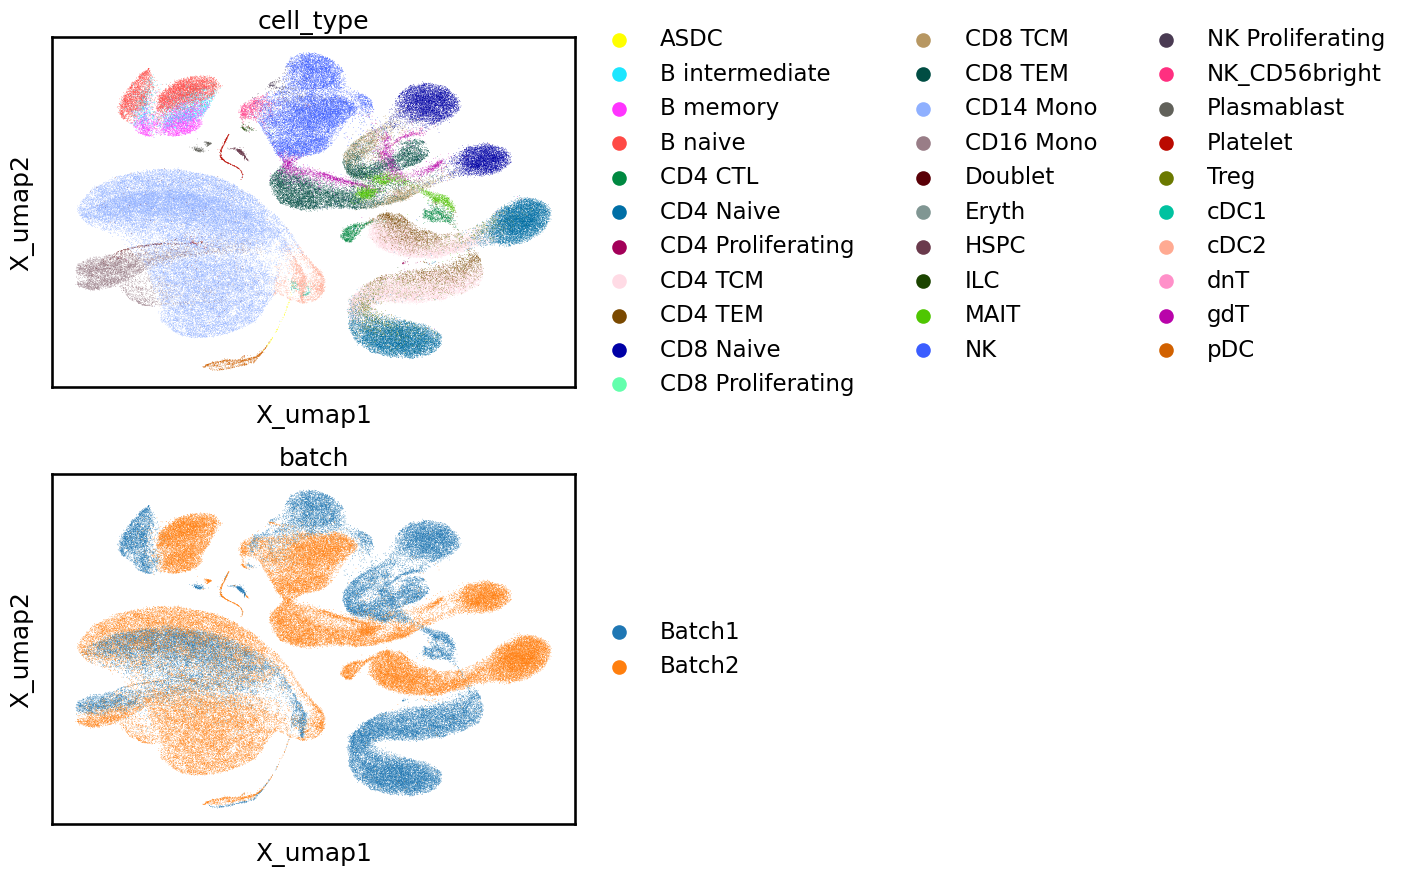

In [10]:
mu.pl.embedding(mdata, color=['cell_type', 'batch'], ncols=1, basis='umap', save='_hao_mofa.png')

In [11]:
scib_anndata = sc.AnnData(mdata.obsm['X_mofa']).copy()
scib_anndata.obs = mdata.obs.copy()
scib_anndata.uns['neighbors'] = mdata.uns['neighbors'].copy()
scib_anndata.obsp['connectivities'] = mdata.obsp['connectivities'].copy()
scib_anndata.obsp['distances'] = mdata.obsp['distances'].copy()
scib_anndata.obsm['X_mofa'] = mdata.obsm['X_mofa'].copy()

In [12]:
scib_anndata.write('hao_mofa.h5ad')

In [13]:
metrics_mofa = scib.metrics.metrics(
    scib_anndata, 
    scib_anndata, 
    batch_key='batch', 
    label_key='cell_type', 
    embed='X_mofa',
    ari_=True,
    nmi_=True,
    silhouette_=True,
    graph_conn_=True,
    isolated_labels_asw_=True,
    verbose=True,
)
metrics_mofa

Clustering...
resolution: 0.1, nmi: 0.7281918284104109
resolution: 0.2, nmi: 0.7683822576828649
resolution: 0.3, nmi: 0.7517488041395423
resolution: 0.4, nmi: 0.7619937531064591
resolution: 0.5, nmi: 0.7351744189969185
resolution: 0.6, nmi: 0.7275272191716846
resolution: 0.7, nmi: 0.7307892979120653
resolution: 0.8, nmi: 0.7260536304838004
resolution: 0.9, nmi: 0.7037847620953016
resolution: 1.0, nmi: 0.7059186681930663
resolution: 1.1, nmi: 0.7063122008914758
resolution: 1.2, nmi: 0.7062458967207721
resolution: 1.3, nmi: 0.7049607859954287
resolution: 1.4, nmi: 0.6992767868407135
resolution: 1.5, nmi: 0.6950202638899127
resolution: 1.6, nmi: 0.6964238798968885
resolution: 1.7, nmi: 0.6955215616588045
resolution: 1.8, nmi: 0.6902325148477229
resolution: 1.9, nmi: 0.6923359052269006
resolution: 2.0, nmi: 0.6947474261483341
optimised clustering against cell_type
optimal cluster resolution: 0.2
optimal score: 0.7683822576828649
NMI...
ARI...
Silhouette score...
Isolated labels ASW...
Grap

,0
NMI_cluster/label,0.768382
ARI_cluster/label,0.598376
ASW_label,0.582690
ASW_label/batch,0.774562
PCR_batch,NaN
cell_cycle_conservation,NaN
isolated_label_F1,NaN
isolated_label_silhouette,0.536573
graph_conn,0.921138
kBET,NaN


In [14]:
metrics_mofa.to_csv('hao_mofa.csv')